# Setup

In [2]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [3]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# Load data



In [4]:
%%R -o mtcars

library(tidyverse)

mtcars

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
                     mpg cyl  disp  hp drat    wt  qsec vs am gear carb
Mazda RX4           21.0   6 160.0 110 3.90 2.620 16.46  0  1    4    4
Mazda RX4 Wag       21.0   6 160.0 110 3.90 2.875 17.02  0  1    4    4
Datsun 710          22.8   4 108.0  93 3.85 2.320 18.61  1  1    4    1
Hornet 4 Drive      21.4   6 258.0 110 3.08 3.215 19.44  1  0    3    1
Hornet Sportabout   18.7   8 360.0 175 3.15 3.440 17.02  0  0    3    2
Valiant             18.1   6 225.0 105 2.76 

In [5]:
%%R 

# pivot mtcars from wide to long using pivot_longer on all columns except the index
mtcars_long <- mtcars %>%
    rownames_to_column(var = "model") %>% # convert rownames (index) to a regular column %>% 
    pivot_longer(cols = -c(model, mpg), names_to = "variable", values_to = "value") 

mtcars_long

# A tibble: 320 × 4
   model       mpg variable  value
   <chr>     <dbl> <chr>     <dbl>
 1 Mazda RX4    21 cyl        6   
 2 Mazda RX4    21 disp     160   
 3 Mazda RX4    21 hp       110   
 4 Mazda RX4    21 drat       3.9 
 5 Mazda RX4    21 wt         2.62
 6 Mazda RX4    21 qsec      16.5 
 7 Mazda RX4    21 vs         0   
 8 Mazda RX4    21 am         1   
 9 Mazda RX4    21 gear       4   
10 Mazda RX4    21 carb       4   
# ℹ 310 more rows
# ℹ Use `print(n = ...)` to see more rows


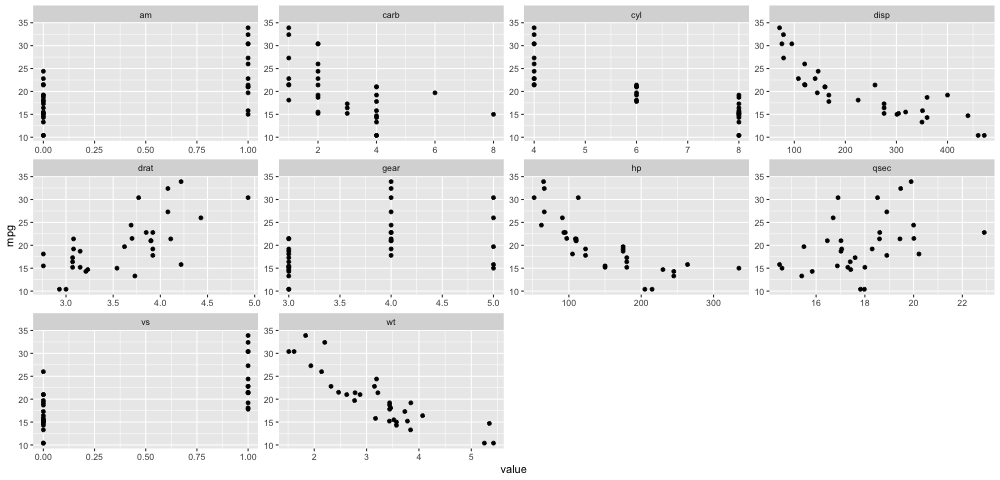

In [6]:
%%R -w 1000

ggplot(mtcars_long) +
        aes(x=value, y=mpg) +
        geom_point() + 
        # geom_smooth(method = "lm") +
        facet_wrap(~variable, scales = "free") 


# Regression model

## Linear model of `mpg~wt`


Call:


lm(formula = mpg ~ wt, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5432 -2.3647 -0.1252  1.4096  6.8727 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  37.2851     1.8776  19.858  < 2e-16 ***
wt           -5.3445     0.5591  -9.559 1.29e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.046 on 30 degrees of freedom
Multiple R-squared:  0.7528,	Adjusted R-squared:  0.7446 
F-statistic: 91.38 on 1 and 30 DF,  p-value: 1.294e-10

`geom_smooth()` using formula = 'y ~ x'


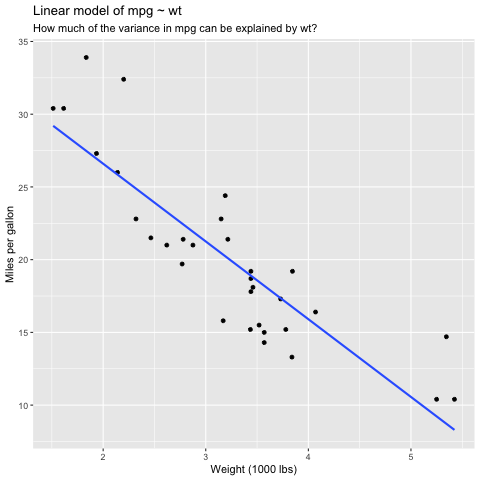

In [32]:
%%R 

# Fit a linear model
model <- lm(mpg ~ wt, data = mtcars) 

# show the summary
print(summary(model))

# Plot the model
ggplot(mtcars, aes(x=wt, y=mpg)) +
        geom_point() + 
        geom_smooth(method = "lm", se=F) + 
        labs(
                title = "Linear model of mpg ~ wt",
                subtitle = "How much of the variance in mpg can be explained by wt?",
                x = "Weight (1000 lbs)",
                y = "Miles per gallon"
        )


* 👉 interpret what the p-value means
* 👉 interpret what the R-squared value means
* 👉 draw a conclusion in words

Let's look at the residuals of this model now.

In [33]:
%%R 

mtcars %>% 
    select(mpg, wt) %>% 
    mutate(
       predicted = predict(model), # get predictions
       residuals = resid(model)    # get residuals
    ) %>% 
    arrange(residuals) # sort by residuals

                     mpg    wt predicted  residuals
Ford Pantera L      15.8 3.170 20.343151 -4.5431513
Duster 360          14.3 3.570 18.205363 -3.9053627
AMC Javelin         15.2 3.435 18.926866 -3.7268663
Camaro Z28          13.3 3.840 16.762355 -3.4623553
Maserati Bora       15.0 3.570 18.205363 -3.2053627
Dodge Challenger    15.5 3.520 18.472586 -2.9725862
Ferrari Dino        19.7 2.770 22.480940 -2.7809399
Toyota Corona       21.5 2.465 24.111004 -2.6110037
Mazda RX4           21.0 2.620 23.282611 -2.2826106
Datsun 710          22.8 2.320 24.885952 -2.0859521
Merc 450SLC         15.2 3.780 17.083024 -1.8830236
Merc 280C           17.8 3.440 18.900144 -1.1001440
Volvo 142E          21.4 2.780 22.427495 -1.0274952
Mazda RX4 Wag       21.0 2.875 21.919770 -0.9197704
Valiant             18.1 3.460 18.793255 -0.6932545
Hornet Sportabout   18.7 3.440 18.900144 -0.2001440
Merc 450SL          17.3 3.730 17.350247 -0.0502472
Porsche 914-2       26.0 2.140 25.847957  0.1520430
Merc 280    

Which cars are least well predicted by this model?

👉

## Linear model of `mpg~hp`

use the code from above (copy paste and just change the x variable from `wt` to `hp`)

In [8]:
%%R 

# Fit a linear model

# show the summary

# Plot the model


NULL


* 👉 interpret what the p-value means
* 👉 interpret what the R-squared value means
* 👉 draw a conclusion in words

In [ ]:
%%R 

# get the predicted values and the residuals 


* 👉 interpret the residuals

## Linear model of `mpg~disp`

In [9]:
%%R 

# Fit a linear model

# show the summary

# Plot the model


NULL


* 👉 interpret what the p-value means
* 👉 interpret what the R-squared value means
* 👉 draw a conclusion in words

In [ ]:
%%R 

# get the predicted values and the residuals 


* 👉 interpret the residuals

## Linear model of `mpg~qsec`

In [10]:
%%R 

# Fit a linear model

# show the summary

# Plot the model


NULL


* 👉 interpret what the p-value means
* 👉 interpret what the R-squared value means
* 👉 draw a conclusion in words

In [ ]:
%%R 

# get the predicted values and the residuals 


* 👉 interpret the residuals